# T0 Introduction to machine learning

# Index

1. What is machine learning?
2. Supervised learning
3. Classification
     * Example: classification of iris flowers
     * Exploratory data analysis
     * Learning a classifier
     * Minimization of the empirical risk
     * Uncertainty: probabilistic models
     * Estimation by maximum likelihood
4. Unsupervised learning: clustering
5. Reinforcement learning
6. Machine learning and other areas
7. Considerations

# 1 What is machine learning (ML)?

**Arthur Samuel (1959):** $\;$ field of study that gives computers the ability to learn without being explicitly programmed

**Tom Mitchell (1997):** $\;$ a system learns from experience E with respect to a class of tasks T and a performance measure R, if its performance on T, as measured by R, improves with E

**Kevin Murphy (2022):**
* There are many types of ML according to Mitchell, depending on the nature of T, R and E
* The usual types of ML can be conveniently treated from a probabilistic (statistical) perspective
* The probabilistic approach is optimal for decision making under uncertainty and formally frames ML along with many other scientific and engineering areas

# 2 Supervised learning

**Supervised learning:** $\;$ most common type of ML

**Task T:** $\;$ It consists of learning a transformation $f:\mathcal{X}\to\mathcal{Y}$ where
* **Inputs $\boldsymbol{x}\in\mathcal{X}$:** $\;$ They are usually a D-dimensional vector of real features $\mathcal{X}=\mathbb{R}^D$
* **Outputs $\boldsymbol{y}\in\mathcal{Y}$:** $\;$ They are usually class (**classification**) or real (**regression**) labels

**Experience E:** $\;$ given by a **training set** $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\} _{n=1}^N$
* $N$ is the **size of the sample**
* It is also usual to refer to each pair $(\boldsymbol{x}_n,\boldsymbol{y}_n)$ as **(training) sample**

**Performance Measure P:** $\;$ It depends on the type of the output

# 3 Classification

**Classification problem:** $\;$ The output space is a set of $C$ **class labels,** $\;\mathcal{Y}=\{1,2,\dotsc ,C\}$

**Pattern recognition:** $\;$ Prediction of the class label of a given input

**Binary classification:** $\;$ Particular case in which we only have two classes, $\,y\in\{0,1\}\,$ or $\,y\in\{-1,+ 1\}$

## Example: Classification of iris flowers

**Classification of iris flowers of the setosa, versicolor and virginica species:** $\;$ Classic example in statistical classification

<centre>

| Setosa | Versicolor | Virginica |
| -------------------------- | ------------------------------ | ------------------------------ |
| <img src="Figure_1.1_A.png" width="150"/> | <img src="Figure_1.1_B.png" width="150"/> | <img src="Figure_1.1_C.png" width="150"/> |

</center>

**Input space:** $\;\mathcal{X}$ is a set of images that, in general, is of very high dimension
* *Example:* $\;\mathcal{X}=\mathbb{R}^D$ with $D=C\times D_1\times D_2\,$ for a color image with $C=3$ channels and $D_1\times D_2$ pixels
* **Learning $f:\mathcal{X}\to\mathcal{Y}$:** $\,$ it is very difficult, although certain advanced models manage to learn $f$ in some tasks

**A priori knowledge:** $\;$ Prior knowledge about the task that allows us to simplify it
* **Iris:** The length and width of sepals and petals is highly discriminative, so we can work with an input space of much smaller dimension than that of the original images, $\mathcal{X}= \mathbb{R}^4$

**Tabulated data or data array:** $\;$ Array of $N$ data samples ($N$ rows) and $D$ features along with class labels ($D+1$ columns)

**Corpus iris:** $\;$ Array of $N=150$ samples described with $D=4$ features along with class labels ($50$ per class)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = pd.Series(iris.target_names[iris.target], dtype='category')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory data analysis

**Exploratory data analysis:** $\;$ Preliminary study of the data of an ML problem to become familiar with it
* **Detection of obvious patterns in the data:** $\;$ If there are any, to get an idea of the difficulty of the problem and, ultimately, what results we can expect with different methods (e.g. linear or non-linear classifier)
* **Detecting obvious problems with the data:**
     * **Outliers:** $\;$ Data with **missing** or **incorrect** features or labels (e.g. outside the domain of the variable)
     * **Label noise (doubtful labels):** $\;$ Data with class labels that are not clear

**Visual inspection:** $\;$ Exploratory data analysis through graphical representation  (if $D$ is small)
* **Pair plot:** $\;$ Matrix of $D\times D$ plots for individual (on the diagonal) and paired (outside the diagonal) features

**Example:** $\;$ pair graph for iris; setosa separates linearly; setosa and virginica also separate well enough

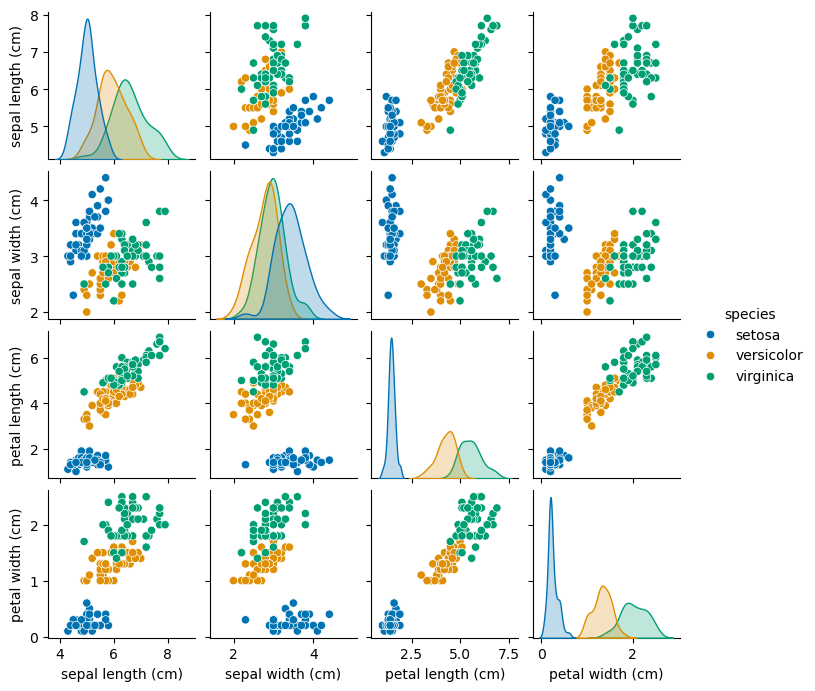

In [3]:
import seaborn as sns
sns.pairplot(data, hue="species", height = 1.75, palette = 'colorblind');

## Learning a classifier

**Learning a classifier or decision rule $\,f(\boldsymbol{x};\boldsymbol{\theta})$:** $\;$ It usually boils down to choosing a value for the $\boldsymbol {\theta}$ that governs the classifier or decision rule

**Effect of a classifier:** $\;$ partitions the input space into **decision regions** separated by **decision boundaries**

**Example:** simple decision rule to distinguish setosa from non-setosa in iris using petal length ($x$)
$$f(\boldsymbol{x};\boldsymbol{\theta})=\left\{\begin{array}{l}%
\text{setosa} \hspace{2.75cm} \text{if} \;  x\leq 2.45\\
\text{versicolor or virginica} \quad \text{otherwise}
\end{array}\right.$$
In this rule we have parameters $\,\boldsymbol{\theta}=(2.45),\,$ boundary $\,x=2.45\,$, and regions $\,\mathcal{R}_{\text{setosa} }=\{x\leq 2.45\}\,$ and $\,\mathcal{R}_{\text{non-setosa}}=\{x>2.45\}$

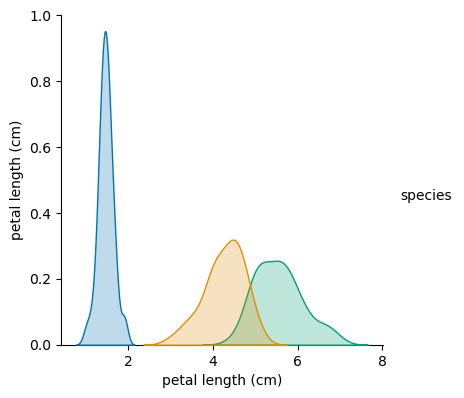

In [8]:
sns.pairplot(data, vars = data.columns[2:3], hue="species", height = 4, palette = 'colorblind');

**Example (cont.):** refinement of the previous rule by recursively partitioning the regions to build a **decision tree;** we only add a sub-rule to partition the non-setosa region into versicolor and virginica according to the width of the petals

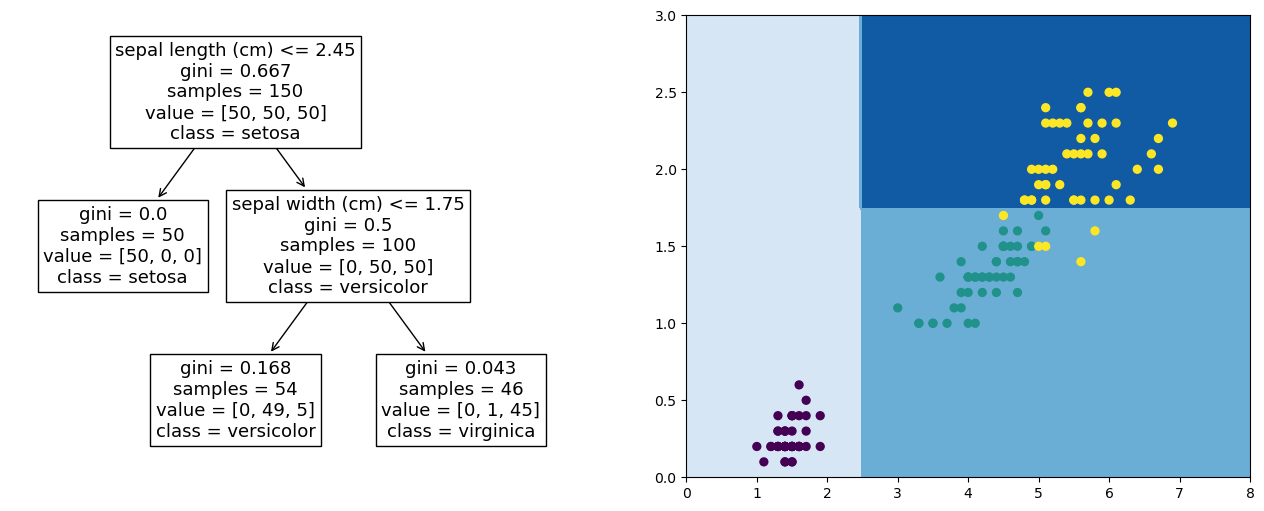

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = iris.data[:, [2, 3]]; y = iris.target
dt = DecisionTreeClassifier(max_depth=2, random_state=23).fit(X, y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, ax=axes[0], fontsize=13);
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = axes[1].contourf(xx, yy, Z, 2, cmap='Blues'); axes[1].scatter(*X.T, c=y, s=32);

## Empirical risk minimization

**Error rate (in training):** $\;$ Obvious performance measure to learn the $\boldsymbol{\theta}$ of a classifier
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_{n=1}^N\mathbb{I}(y_n\neq f(\boldsymbol{x}_n;\boldsymbol{\theta}))
\quad\text{with}\quad%
\mathbb{I}(\text{true})=1,\;\mathbb{I}(\text{false})=0$$

**Empirical risk:** $\;$ Generalizes the error rate by introducing a **loss function** $\ell(y,\hat{y})$ to measure the loss (cost ) produced by classifying a sample of the class $y$ in the class $\hat{y}$
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{N}\sum_ {n=1}^N\ell(y_n, f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Loss 01:** $\;\ell_{01}(y,\hat{y})=\mathbb{I}(y\neq\hat{y})$, particularizes the empirical risk as the error rate

**Usual loss functions:** $\;$ Losses similar to 01, although not exactly 01, are used to simplify the learning process

**Empirical risk minimization:** $\;$ It is the basic approach to **model training or fitting**
$$\hat{\boldsymbol{\theta}}=\operatorname*{argmin}_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})=\operatorname*{argmin}_{ \boldsymbol{\theta}} \frac{1}{N}\sum_{n=1}^N\ell(y_n,f(\boldsymbol{x}_n;\boldsymbol{\theta}))$$

**Optimal generalization:** $\;$ Indeed, the actual goal is to minimize the expected loss on future data not yet seen, that is, we want the model to generalize as much as possible, not to simply perform well on the training data

## Uncertainty: probabilistic models

**Impossibility of learning error-free classifiers:** $\;$ Due to model and data uncertainty

**Probabilistic model:** $\;$ To predict a probability distribution over classes instead of a single class
$$p(y=c\mid \boldsymbol{x}; \boldsymbol{\theta})=f_c(\boldsymbol{x}; \boldsymbol{\theta})%
\qquad\text{where}\qquad%
f:\mathcal{X}\to[0, 1]^C, \quad 0\leq f_c\leq 1, \quad \sum_c f_c=1$$

## Estimation by maximum likelihood

**Log-loss or neg-log-likelihood:** $\;$ usual loss function for fitting probabilistic models
$$\ell(y, f(\boldsymbol{x}; \boldsymbol{\theta}))=-\log p(y\mid f(\boldsymbol{x}; \boldsymbol{\theta}))$$
* If the model assigns probability one to the correct class, the loss is zero;
* If not, the loss will be positive and will be greater when the probability assigned to the correct class is lower

**Neg-log-likelihood (NLL):** $\;$ Empirical risk with log-loss
$$\operatorname{NLL}(\boldsymbol{\theta})%
=-\frac{1}{N}\sum_n \log p(y_n\mid f(\boldsymbol{x}_n; \boldsymbol{\theta}))$$

**Maximum Likelihood Estimator (MLE):** $\;$ Parameter vector that minimizes the NLL
$$\hat{\boldsymbol{\theta}}_{\text{mle}}%
=\operatorname*{argmin}_{\boldsymbol{\theta}}\;\operatorname{NLL}(\boldsymbol{\theta})$$
* MLE is very frequently used to fit models from training data

**Example:** $\;$ simple probabilistic model (**logistic regression**) for iris using petal length and width; after maximum likelihood adjustment, we classify each possible entry into the most likely class according to the model

W= [[ 11.12767979   3.22717485 -14.35485463]
 [ -2.74866104   0.08356447   2.66509657]
 [ -1.16890756  -0.90803047   2.07693804]]


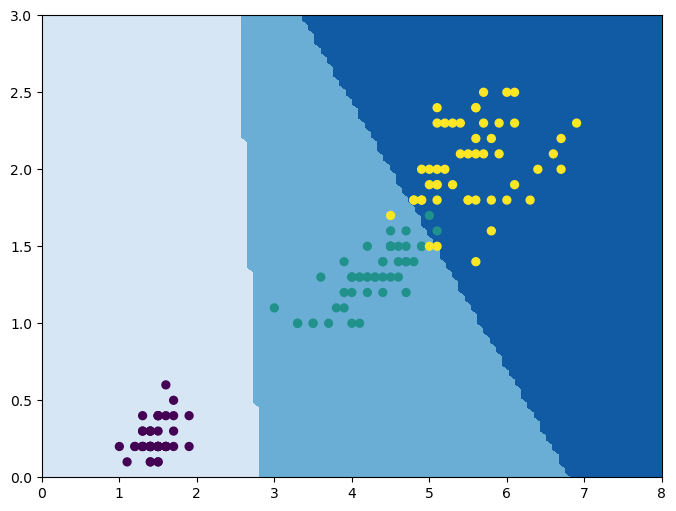

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X = iris.data[:, [2, 3]]; y = iris.target
rl = LogisticRegression().fit(X, y)
print("W=", np.vstack((rl.intercept_, rl.coef_.T)))
fig = plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(0, 8, num=100), np.linspace(0, 3, num=100))
Z = rl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cp = plt.contourf(xx, yy, Z, 2, cmap='Blues'); plt.scatter(*X.T, c=y, s=32);

# 4 Unsupervised learning

**Unsupervised learning:** $\;$ It tries to "explain" the data when we only have one set of "inputs", $\mathcal{D}=\{\boldsymbol{x}_n\}_{ n=1}^N$, without its corresponding "outputs" $\{\boldsymbol{y}_n\}$

**Probabilistic approximation:** $\;$ It fits an unconditional model $p(\boldsymbol{x})$, instead of a conditional one $p(\boldsymbol{y}\mid\boldsymbol{x})$ as in supervised learning

**Wider applicability:** $\;$ of unsupervised learning than supervised
* This is because unsupervised data is easy to obtain; not so the supervised data
* In addition, unsupervised learning can be applied to ill-defined tasks, as it does not in principle require having a given set of categories, or even assuming that the data is grouped into a given number of categories

## Clustering

**Clustering:** $\:$ Classic area of exploratory data analysis with the aim of finding **natural groupings** of the data in homogeneous groups or **clusters**

**Example:** $\;$ Clustering of iris according to petal length and width

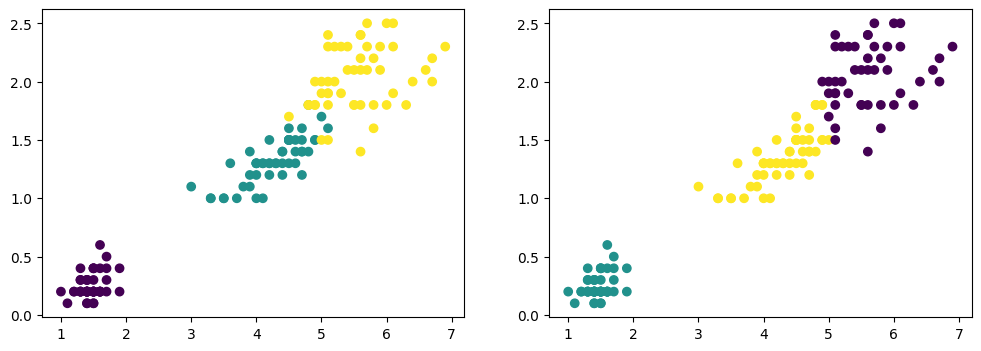

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris(); X = iris.data[:, [2, 3]]; y = iris.target
K = 3 # <<< select number of clusters
y_pred = KMeans(n_clusters=K, n_init=1, random_state=42).fit(X).predict(X)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(*X.T, c=y); axes[1].scatter(*X.T, c=y_pred);

# 5 Reinforcement learning

**Reinforcement learning (RL):** $\;$ The system or **agent** interacts with its environment through a **policy** $\boldsymbol{a}=\pi(\boldsymbol {x})$ which specifies what action to take in response to each possible input $\boldsymbol{x}$ (derived from the state of the environment)
* **Also called learning with a teacher:** $\;$ By comparison with **supervised learning,** since the system is not taught the optimal action to take in each turn, but it receives an occasional **reward (or punishment)** in response to the actions it takes
* *Examples:* $\;$ Movement of the ship in Space Invaders or the motor control of a robot that must perform a certain task

**High Applicability and Difficulty:** $\;$ Although very popular due to its high applicability, it is very difficult since the reward is only obtained occasionally and the agent may not know which of its multiple actions led to this reward

# 6 Machine learning and other areas

**Predictive analytics:** $\;$ Similar to ML, focuses on business applications such as customer relationship management, billing analysis and portfolio forecasting

**Data Mining:** $\;$ It covers both supervised and unsupervised learning, but it targets (structured) databases

**Data Science:** $\;$ It employs ML and statistical techniques, but from a more statistical perspective, emphasizing data integration and visualization, as well as the role of the data analyst and domain expert analysis

**Symbolic AI:** $\;$ It is based on logic, symbolic list processing, and expert knowledge; declined in the 90s, **modern AI** is synonymous with ML and neural networks

**Basics of ML:** $\;$ Probability, statistics, decision and information theories, linear algebra and optimization

#7 Considerations

**Alignment problem:** $\;$ Discrepancy between what we ask our algorithms to optimize and what we actually want them to do for us

**AI ethics and safety:** $\;$ The extraordinary progress of AI in recent years has caused great concern both about the ethics of the developed systems (what we want them to do and possible uses) and their security (what we have actually asked from them and unwanted uses)

**General artificial intelligence (GAI):** $\;$ The classic view of AI states that we will reach GAI systems through the development of increasingly advanced systems that make decisions on their own, without human intervention

**Augmented intelligence:** $\;$ Alternative view of AI according to which AI systems are intelligent tools under human control in decision-making; even if AI tools are increasingly autonomous, the goal is to facilitate people's work, not to emulate or replace them

**Regulation of AI:** $\;$ As of June 2023, the use of AI in the EU is regulated by the Artificial Intelligence Act, which sets out obligations for providers and users as a function of AI risk level (unacceptable, high and limited)